# Setup

## Install Detectron2

In [1]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
# !git clone 'https://github.com/facebookresearch/detectron2'
# dist = distutils.core.run_setup("./detectron2/setup.py")
# !python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
# sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 274 kB 6.2 MB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.1-cp38-cp38-linux_x86_64.whl size=44074 sha256=2e99655f36b7c6c9d793773ea549adb68cbe6515fd4a9ade21180d4b6917946e
  Stored in directory: /home/shabanza/.cache/pip/wheels/52/dd/2b/10ff8b0ac81b93946bb5fb9e6749bae2dac246506c8774e6cf
Successfully built pyyaml
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.7.0 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-x8w82efd
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-x8w82efd
     |████████

In [1]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Mon_May__3_19:15:13_PDT_2021
Cuda compilation tools, release 11.3, V11.3.109
Build cuda_11.3.r11.3/compiler.29920130_0
torch:  1.10 ; cuda:  cu113
detectron2: 0.6


## Install Mask2Former

In [2]:
# clone and install Mask2Former
# !git clone https://github.com/facebookresearch/Mask2Former.git
%cd Mask2Former
%pip install -U opencv-python
# %pip install git+https://github.com/cocodataset/panopticapi.git
%pip install -r requirements.txt
%cd mask2former/modeling/pixel_decoder/ops
!python setup.py build install

/scratch/shabanza/segmentation/Mask2Former
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 61.7 MB 6.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 2.3 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 108.1 MB/s eta 0:00:01
     |████████████████████████████████| 73 kB 8.1 MB/s s eta 0:00:01
     |████████████████████████████████| 1.3 MB 78.4 MB/s eta 0:00:01
     |████████████████████████████████| 268 kB 96.3 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  NOTE: The current PATH contains path(s) starting with `~`, which may not be expanded by all applications.
Note: you may need to restart the kernel to use updated packages.
/scratch/shabanza/segmentation/

In [3]:
%cd /scratch/shabanza/segmentation/Mask2Former
%cd mask2former/modeling/pixel_decoder/ops
!sudo sh make.sh
%cd /scratch/shabanza/segmentation/Mask2Former

/scratch/shabanza/segmentation/Mask2Former
/scratch/shabanza/segmentation/Mask2Former/mask2former/modeling/pixel_decoder/ops
running build
running build_py
running build_ext
building 'MultiScaleDeformableAttention' extension
Emitting ninja build file /scratch/shabanza/segmentation/Mask2Former/mask2former/modeling/pixel_decoder/ops/build/temp.linux-x86_64-3.8/build.ninja...
Compiling objects...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
ninja: no work to do.
g++ -pthread -shared -B /opt/conda/compiler_compat -L/opt/conda/lib -Wl,-rpath=/opt/conda/lib -Wl,--no-as-needed -Wl,--sysroot=/ /scratch/shabanza/segmentation/Mask2Former/mask2former/modeling/pixel_decoder/ops/build/temp.linux-x86_64-3.8/scratch/shabanza/segmentation/Mask2Former/mask2former/modeling/pixel_decoder/ops/src/vision.o /scratch/shabanza/segmentation/Mask2Former/mask2former/modeling/pixel_decoder/ops/build/temp.linux-x86_64-3.8/scratch/shabanza/segment

For gccxx not found error:
> sudo apt-get update

> sudo apt-get install software-properties-common

> sudo add-apt-repository ppa:ubuntu-toolchain-r/test

> sudo apt-get upgrade libstdc++6

For libGL error:
> sudo apt-get install ffmpeg libsm6 libxext6  -y

## Imports

In [1]:
# import some common libraries
import torch
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
torch.cuda.empty_cache()

In [4]:
# You may need to restart your runtime prior to this, to let your installation take effect
# %cd Mask2Former
# Some basic setup:
# Setup detectron2 logger
from detectron2.utils.logger import setup_logger
setup_logger()
setup_logger(name="mask2former")


# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog
coco_metadata = MetadataCatalog.get("coco_2017_val_panoptic")

# Dataset

In [5]:
from detectron2.data import DatasetCatalog, MetadataCatalog
from src.dataset.register_comic_instance import *

registering comic ...
loading sinergia json ...
Sinergia Json loaded.
registering placid ...


100%|██████████| 47256/47256 [00:00<00:00, 1133558.07it/s]


registering yves ...


100%|██████████| 47256/47256 [00:00<00:00, 1192417.55it/s]


In [6]:
dataset_name = DATASET_NAME

dataset_dicts = DatasetCatalog.get(dataset_name)
metadata = MetadataCatalog.get(dataset_name)

[09/01 15:10:52 d2.data.datasets.coco]: Loading /home/yalda/IVRL_backup/shabanza_sinergia/datasets/sinergia/coco/annotations/instances_default_modified.json takes 1.25 seconds.
[09/01 15:10:52 d2.data.datasets.coco]: Loaded 282 images in COCO format from /home/yalda/IVRL_backup/shabanza_sinergia/datasets/sinergia/coco/annotations/instances_default_modified.json


In [7]:
placid_dataset_dicts = DatasetCatalog.get(PLACID_NAME)
placid_metadata = MetadataCatalog.get(PLACID_NAME)

[09/01 15:10:53 d2.data.datasets.coco]: Loaded 154 images in COCO format from /home/yalda/IVRL_backup/shabanza_sinergia/datasets/sinergia/coco/annotations/instances_placid.json


In [8]:
yves_dataset_dicts = DatasetCatalog.get(YVES_NAME)
yves_metadata = MetadataCatalog.get(YVES_NAME)

[09/01 15:10:54 d2.data.datasets.coco]: Loaded 128 images in COCO format from /home/yalda/IVRL_backup/shabanza_sinergia/datasets/sinergia/coco/annotations/instances_yves.json


# Finetune

In [47]:
from src.evaluation.instance_evaluation import *
from src.evaluation.semantic_evaluation import *
from src.evaluation.helpers import *
from src.dataset.register_train_test import *
from src.dataset.helpers import *
from src.train.config import *
from src.train.comic_trainer import *

## Placid

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
%cd /home/yalda/IVRL_backup/shabanza_scratch/segmentation

cfg = base_setup()

/home/yalda/IVRL_backup/shabanza_scratch/segmentation


In [16]:
dataset_name = NAME_MAPPER['placid']
print(dataset_name)
dataset_train_name, dataset_test_name = register_train_test(
    dataset_name, 
    test_size=0.2, 
    random_state=42
)
dataset_train_name = register_panels(dataset_train_name, 'train')
# dataset_test_name = register_panels(dataset_test_name, 'test')
    
cfg.DATASETS.TRAIN = (dataset_train_name, )
cfg.DATASETS.TEST = (dataset_test_name, )

sinergia_placid_instances
registering train test dataset ...
[09/01 15:11:38 d2.data.datasets.coco]: Loading /home/yalda/IVRL_backup/shabanza_sinergia/datasets/sinergia/coco/annotations/instances_placid.json takes 1.09 seconds.
[09/01 15:11:38 d2.data.datasets.coco]: Loaded 154 images in COCO format from /home/yalda/IVRL_backup/shabanza_sinergia/datasets/sinergia/coco/annotations/instances_placid.json
sinergia_placid_instances_train 123
sinergia_placid_instances_train_cropped already registered...!


In [23]:
from src.dataset.helpers import get_min_max_sizes

In [24]:
cfg.INPUT.MIN_SIZE_TEST, cfg.INPUT.MAX_SIZE_TEST = get_min_max_sizes(dataset_test_name)

In [17]:
data_loader = ComicTrainer.build_train_loader(cfg)

[09/01 15:11:44 d2.data.build]: Removed 0 images with no usable annotations. 65 images left.
[09/01 15:11:44 d2.data.build]: Distribution of instances among all 28 categories:
|   category    | #instances   |   category   | #instances   |  category  | #instances   |
|:-------------:|:-------------|:------------:|:-------------|:----------:|:-------------|
| Generic Obj.. | 105          |     Car      | 0            |    Bus     | 0            |
|    Bicycle    | 0            |  Motorbike   | 0            |  Airplane  | 0            |
|     Boat      | 0            |    Train     | 0            |   Chair    | 0            |
|     Sofa      | 0            |    Table     | 1            |   Plant    | 21           |
|      Cat      | 0            |     Dog      | 0            |    Cow     | 0            |
|     Horse     | 0            |    Sheep     | 0            |    Bird    | 1            |
| Generic Ani.. | 6            |   Building   | 11           | Background | 0            |
|    

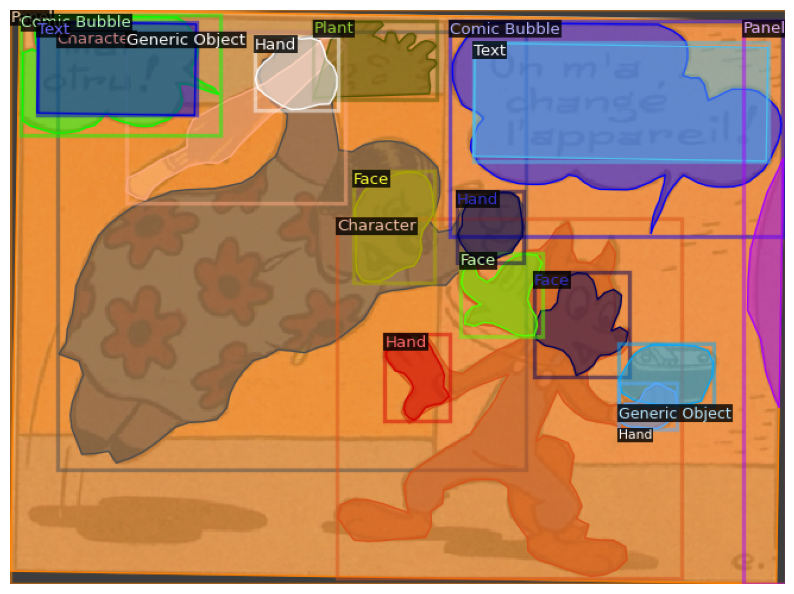

In [19]:
batch = next(iter(data_loader))
im = batch[1]['image'].cpu().numpy().transpose((1, 2, 0))
v = Visualizer(im, placid_metadata, scale=1.2, instance_mode=ColorMode.IMAGE_BW)
r = v.draw_dataset_dict(batch[1]).get_image()
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(r)

In [28]:
predictor1 = DefaultPredictor(cfg)

[09/01 15:29:32 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/maskformer/mask2former/coco/instance/maskformer2_swin_large_IN21k_384_bs16_100ep/model_final_e5f453.pkl ...


Weight format of MultiScaleMaskedTransformerDecoder have changed! Please upgrade your models. Applying automatic conversion now ...


In [49]:
predictor2 = ComicPredictor(cfg)

[09/01 15:35:43 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/maskformer/mask2former/coco/instance/maskformer2_swin_large_IN21k_384_bs16_100ep/model_final_e5f453.pkl ...


Weight format of MultiScaleMaskedTransformerDecoder have changed! Please upgrade your models. Applying automatic conversion now ...


In [52]:
index = 1

In [53]:
im = batch[index]['image'].cpu().numpy().transpose((1, 2, 0))
pred_output2 = predictor2(im)
pred_output2

{'sem_seg': tensor([[[1.4927e-05, 1.4927e-05, 1.6664e-05,  ..., 3.3549e-06,
           3.1987e-06, 3.1987e-06],
          [1.4927e-05, 1.4927e-05, 1.6664e-05,  ..., 3.3549e-06,
           3.1987e-06, 3.1987e-06],
          [1.7058e-05, 1.7058e-05, 1.9179e-05,  ..., 3.8687e-06,
           3.6163e-06, 3.6163e-06],
          ...,
          [3.8672e-06, 3.8672e-06, 4.3140e-06,  ..., 4.2926e-06,
           3.2522e-06, 3.2522e-06],
          [4.9380e-06, 4.9380e-06, 5.4734e-06,  ..., 5.8285e-06,
           4.5792e-06, 4.5792e-06],
          [2.8262e-06, 2.8262e-06, 3.0723e-06,  ..., 3.6656e-06,
           2.9651e-06, 2.9651e-06]],
 
         [[3.7486e-08, 3.7486e-08, 4.0864e-08,  ..., 6.0323e-09,
           5.7836e-09, 5.7836e-09],
          [3.7486e-08, 3.7486e-08, 4.0864e-08,  ..., 6.0323e-09,
           5.7836e-09, 5.7836e-09],
          [4.3712e-08, 4.3712e-08, 4.7490e-08,  ..., 6.9223e-09,
           6.5051e-09, 6.5051e-09],
          ...,
          [1.3422e-08, 1.3422e-08, 1.4687e-08, 

In [54]:
im = batch[index]['image'].cpu().numpy().transpose((1, 2, 0))
pred_output1 = predictor1(im)
pred_output1

{'sem_seg': tensor([[[3.2252e-04, 4.3178e-04, 4.1044e-04,  ..., 5.3169e-04,
           4.1628e-04, 2.5160e-04],
          [3.9338e-04, 4.3797e-04, 4.3847e-04,  ..., 7.6541e-04,
           6.7461e-04, 4.4217e-04],
          [4.0233e-04, 4.3862e-04, 4.4302e-04,  ..., 7.7105e-04,
           6.6472e-04, 4.1668e-04],
          ...,
          [4.3882e-05, 8.5790e-05, 9.2119e-05,  ..., 1.0122e-04,
           8.1732e-05, 6.3038e-05],
          [2.6100e-05, 4.9046e-05, 5.5228e-05,  ..., 7.0993e-05,
           4.7938e-05, 3.9781e-05],
          [2.2751e-05, 3.3090e-05, 3.8119e-05,  ..., 4.5255e-05,
           2.2788e-05, 2.0714e-05]],
 
         [[6.0796e-07, 7.5299e-07, 7.4525e-07,  ..., 6.8480e-07,
           5.8891e-07, 3.6996e-07],
          [7.5901e-07, 8.1227e-07, 8.1557e-07,  ..., 7.8313e-07,
           7.7645e-07, 6.3329e-07],
          [7.7455e-07, 8.1858e-07, 8.2467e-07,  ..., 7.5341e-07,
           7.1889e-07, 5.7588e-07],
          ...,
          [4.2323e-08, 1.1978e-07, 1.6480e-07, 

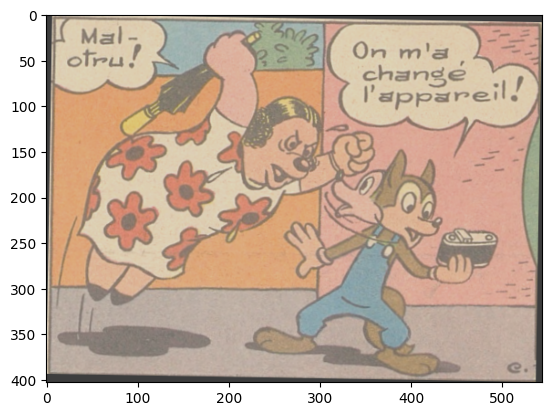

Panoptic segmentation (top), instance segmentation (middle), semantic segmentation (bottom)


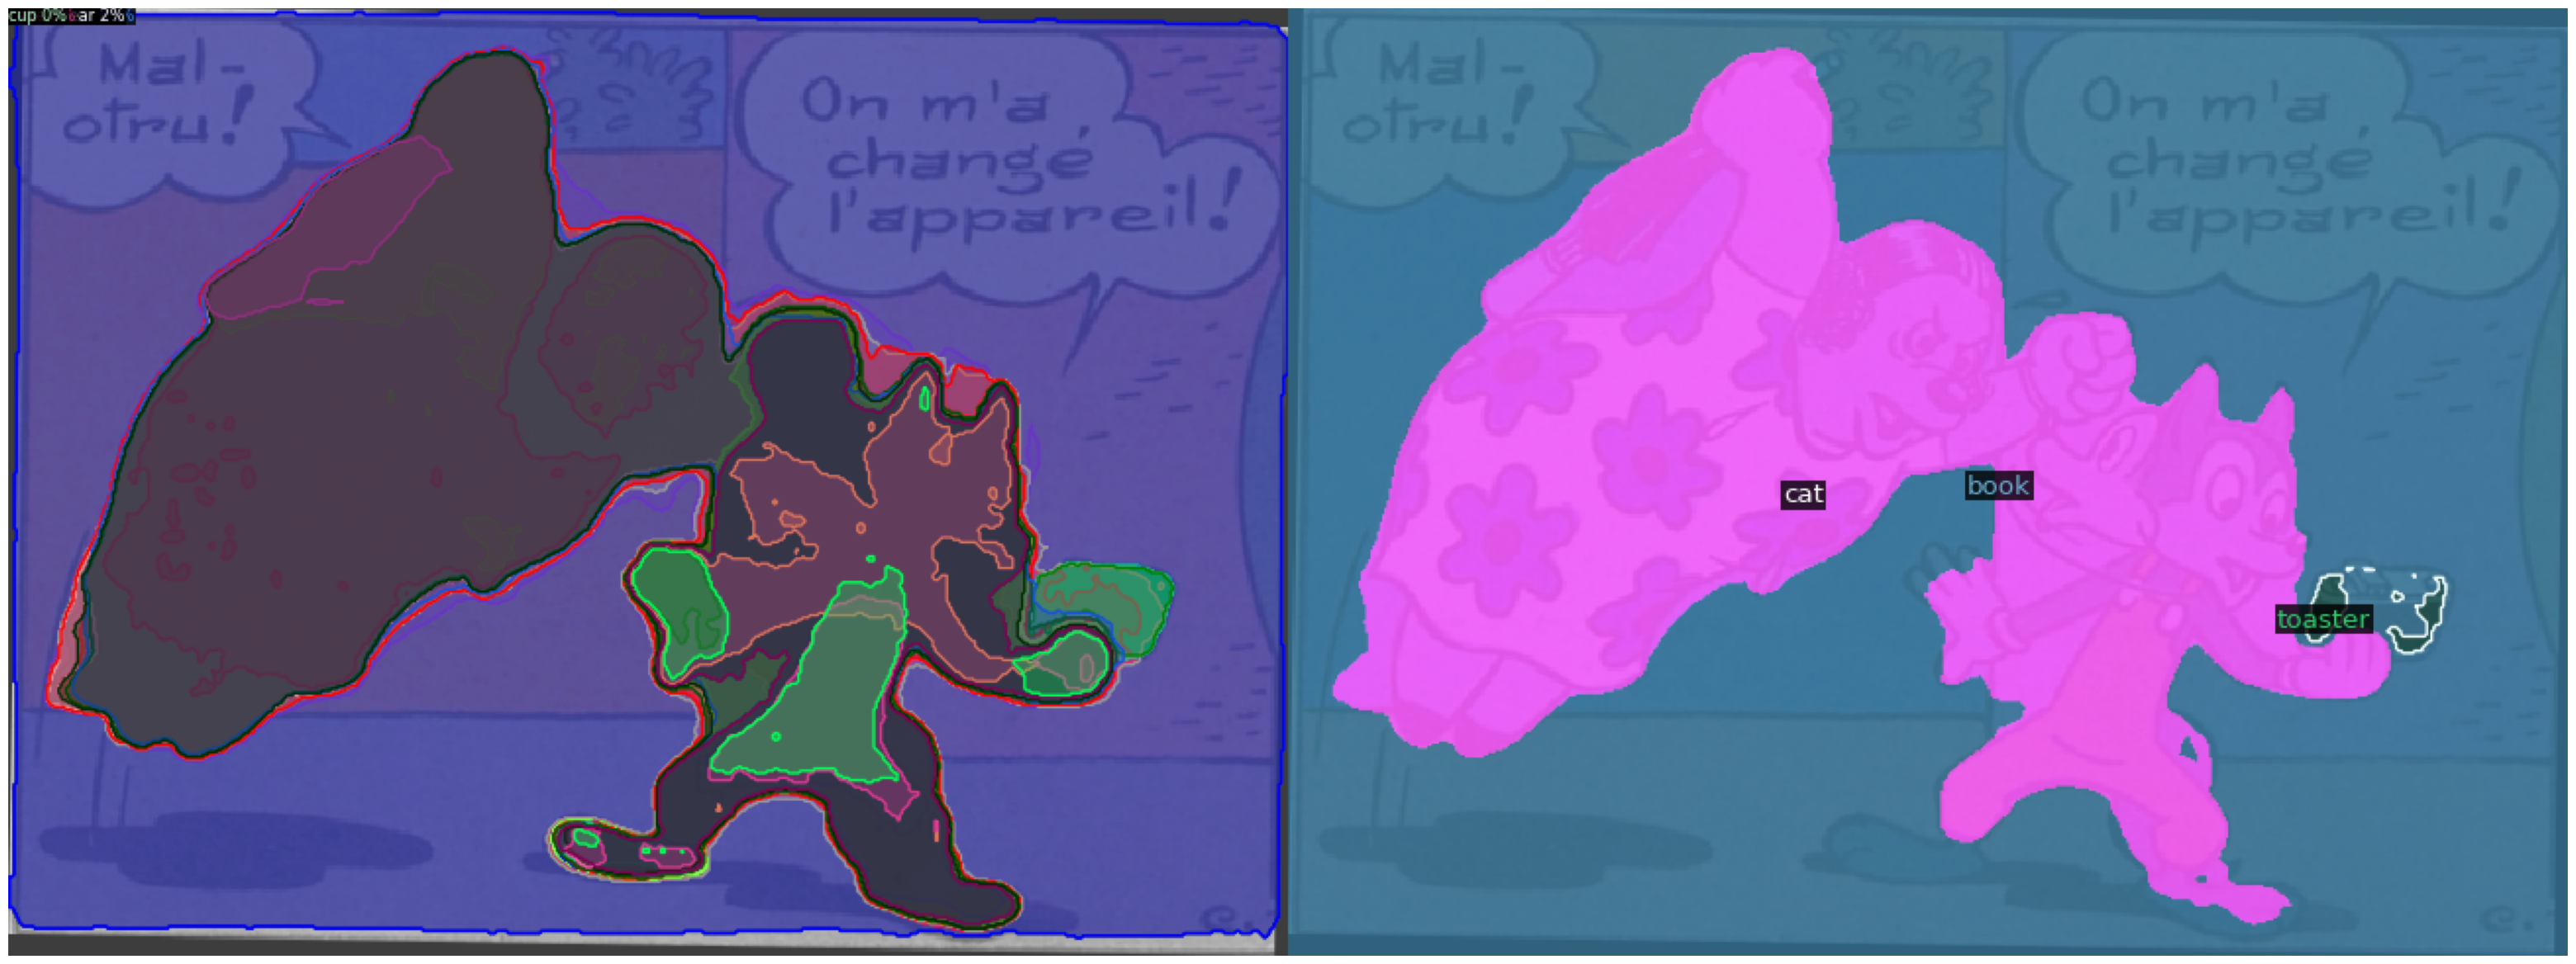

In [57]:
from src.dataset.helpers import *

im = batch[index]['image'].cpu().numpy().transpose((1, 2, 0))
plt.imshow(im)
plt.show()
v = Visualizer(im[:, :, ::-1], coco_metadata, scale=1.2, instance_mode=ColorMode.IMAGE_BW)
instance_result = v.draw_instance_predictions(pred_output2["instances"].to("cpu")).get_image()
v = Visualizer(im, coco_metadata, scale=1.2, instance_mode=ColorMode.IMAGE_BW)
semantic_result = v.draw_sem_seg(pred_output2["sem_seg"].argmax(0).to("cpu")).get_image()
print("Panoptic segmentation (top), instance segmentation (middle), semantic segmentation (bottom)")
res = np.concatenate((instance_result, semantic_result), axis=1)[:,:,::-1]
plt.figure(figsize=(40, 30))
plt.imshow(res)
plt.axis('off')
plt.show()

In [59]:
test_loader = ComicTrainer.build_test_loader(base_setup(), dataset_test_name)

AssertionError: 

In [15]:
import wandb

wandb.init(
    project="comic-seg",
    config={
        "panel_wise": True,
        "dataset": 'placid',
    },
    name='batch2_freeze_semseghead'
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


wandb: Currently logged in as: yaldashbz. Use `wandb login --relogin` to force relogin


In [1]:
from src.train.plain_train_net import do_train


do_train(cfg, model, resume=False, distributed=False, data_loader=data_loader)

registering comic ...
loading sinergia json ...
Sinergia Json loaded.
registering placid ...


100%|██████████| 47256/47256 [00:00<00:00, 1114619.12it/s]


registering yves ...


100%|██████████| 47256/47256 [00:00<00:00, 1201350.60it/s]


ModuleNotFoundError: No module named 'mask2former'

In [32]:
import random

sample = random.choice(placid_dataset_dicts)

In [36]:
from src.dataset.dataset_mapper import image2tensor_mapper


sample_panels = panel_mapper(sample)

In [37]:
panel = image2tensor_mapper(sample_panels[0])

In [40]:
panel['image'].shape

torch.Size([3, 264, 503])

In [48]:
model.eval()
outputs = model([panel])[0]

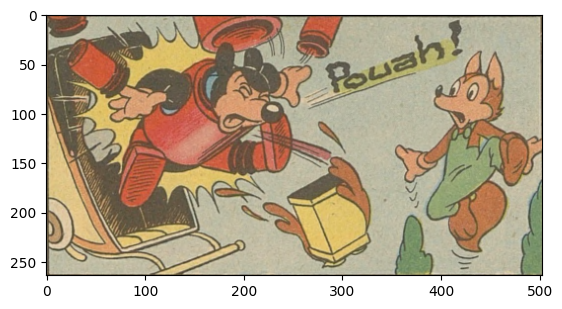

In [58]:
plt.imshow(im)

Panoptic segmentation (top), instance segmentation (middle), semantic segmentation (bottom)


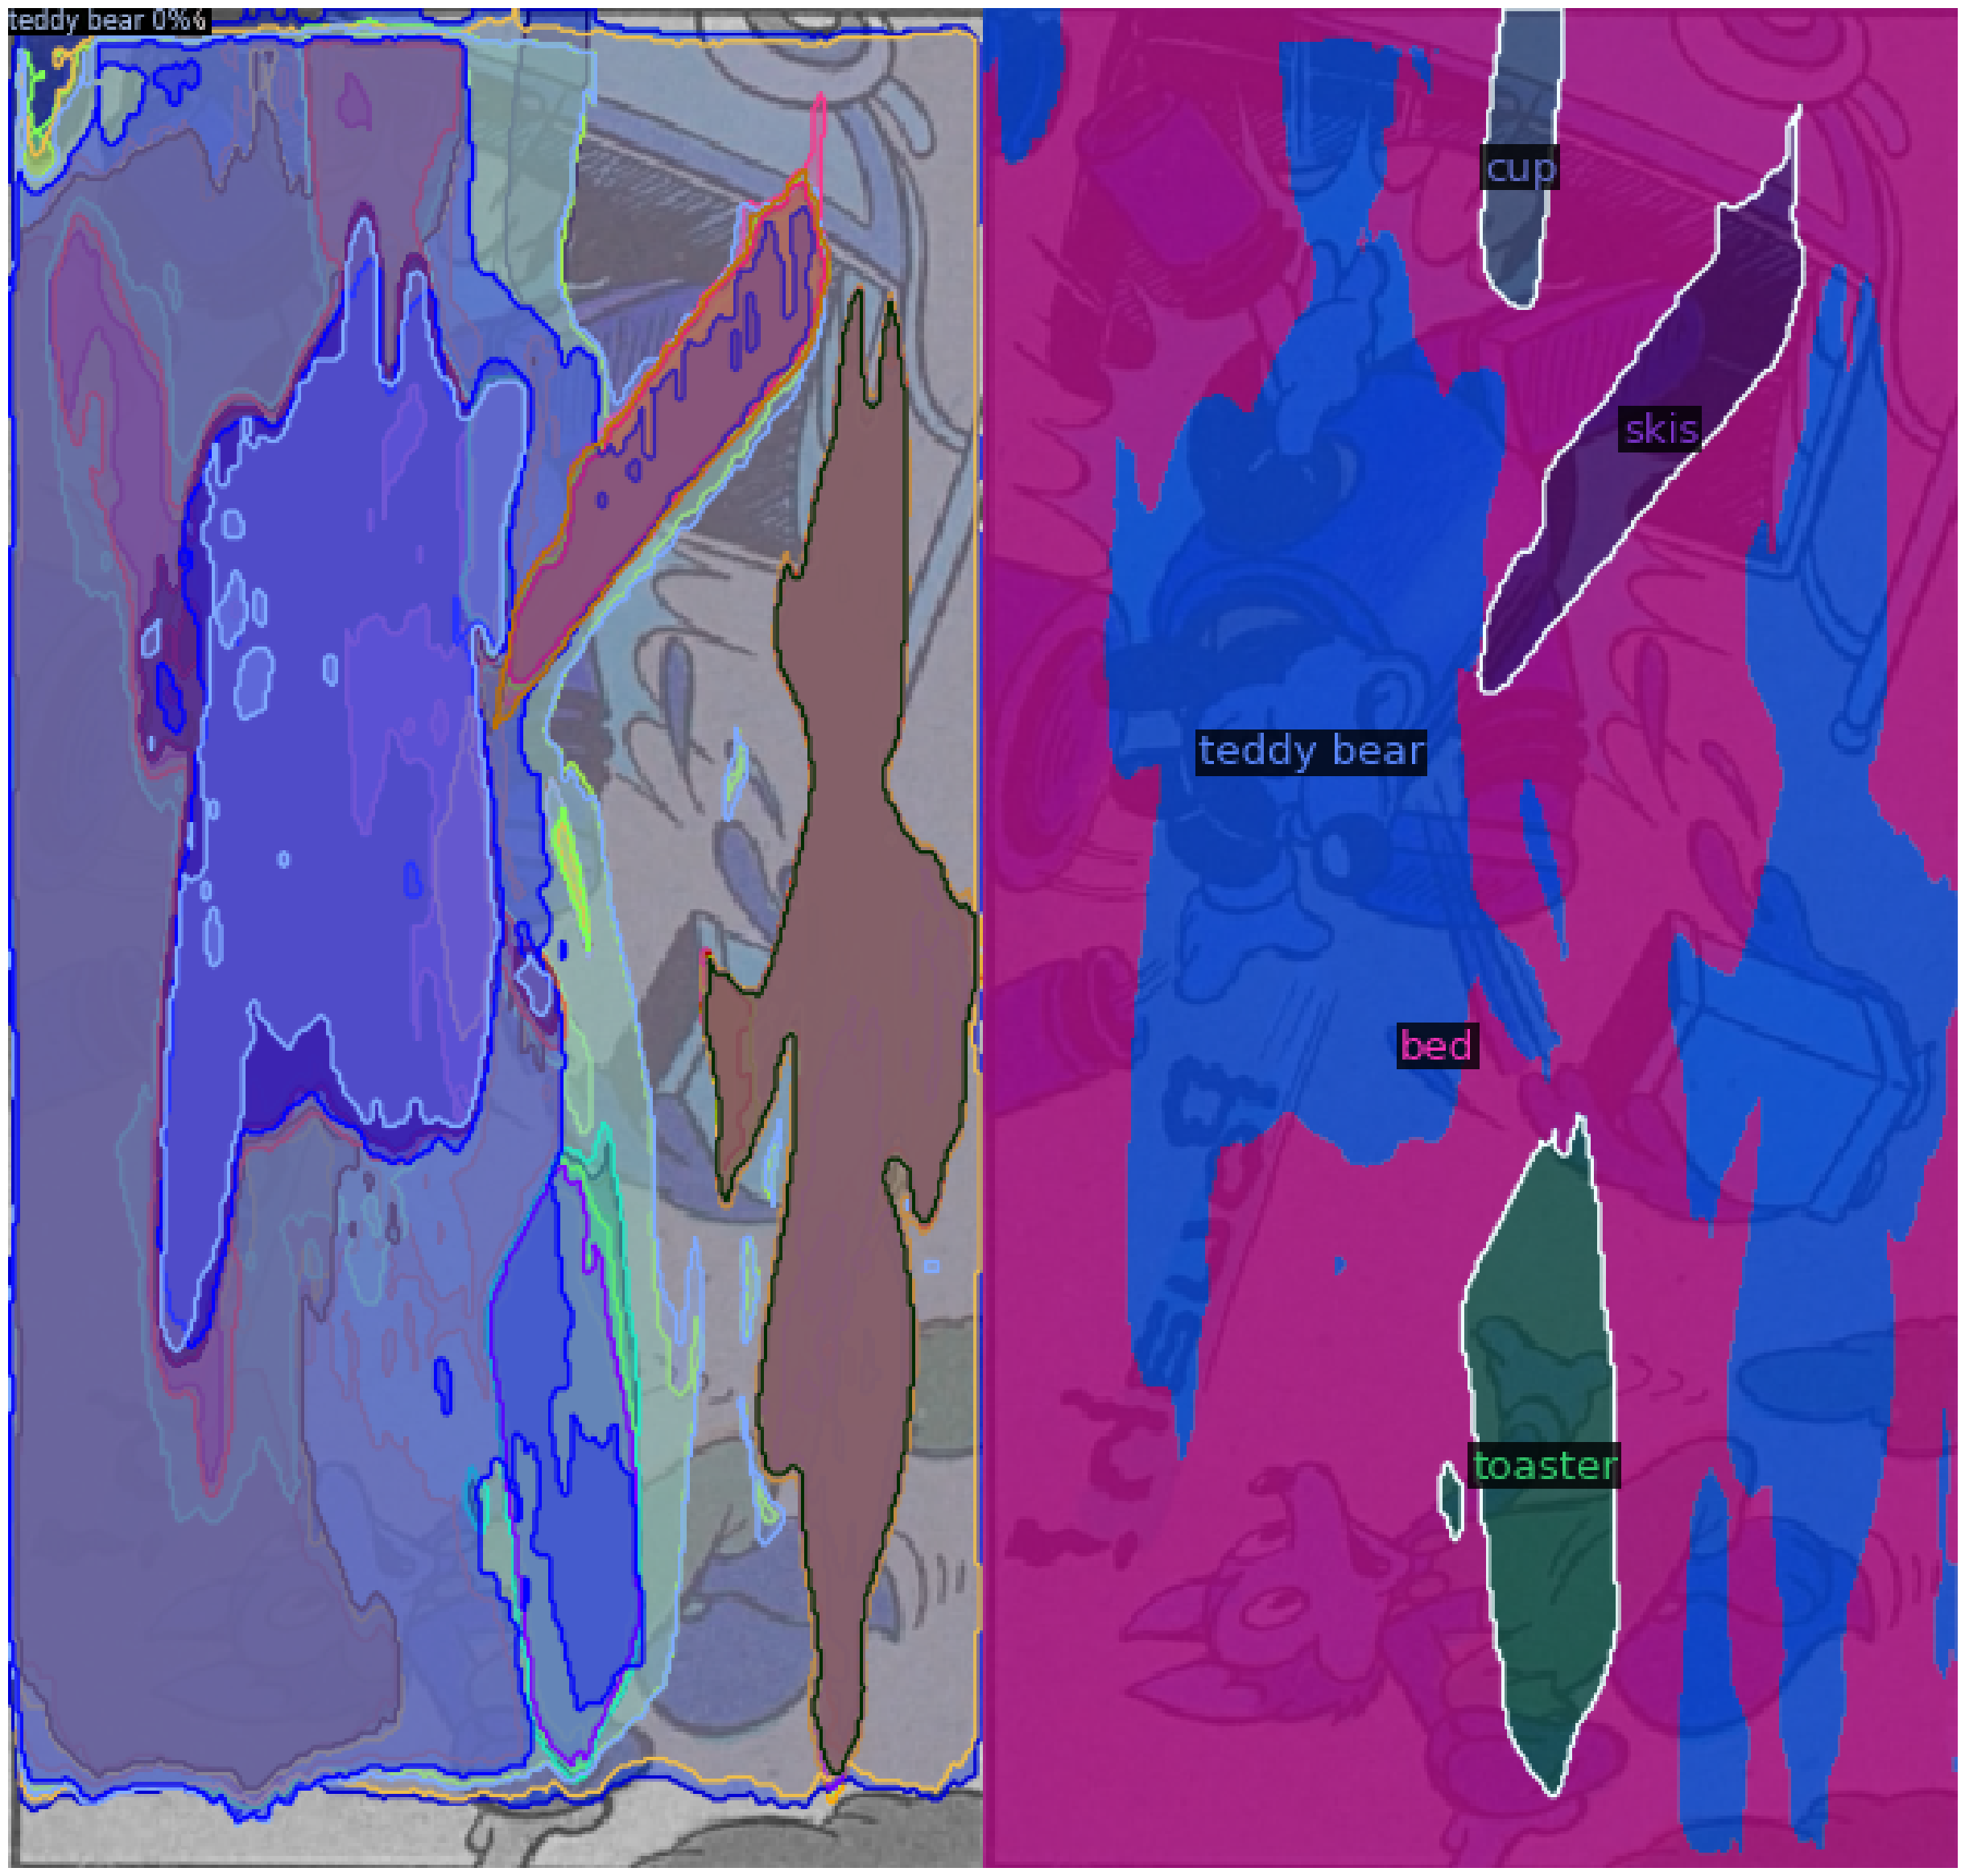

In [59]:
from src.dataset.helpers import *
im = panel['image'].cpu().numpy().transpose(2, 1, 0)

v = Visualizer(im, coco_metadata, scale=1.2, instance_mode=ColorMode.IMAGE_BW)
instance_result = v.draw_instance_predictions(outputs["instances"].to("cpu")).get_image()
v = Visualizer(im, coco_metadata, scale=1.2, instance_mode=ColorMode.IMAGE_BW)
semantic_result = v.draw_sem_seg(outputs["sem_seg"].argmax(0).to("cpu")).get_image()
print("Panoptic segmentation (top), instance segmentation (middle), semantic segmentation (bottom)")
res = np.concatenate((instance_result, semantic_result), axis=1)[:, :, ::-1]
plt.figure(figsize=(40, 30))
plt.imshow(res)
plt.axis('off')
plt.show()

In [31]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = ComicTrainer(cfg)
trainer.resume_or_load(resume=True)
trainer.train()

[08/23 14:11:19 d2.engine.defaults]: Model:
MaskFormer(
  (backbone): D2SwinTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 192, kernel_size=(4, 4), stride=(4, 4))
      (norm): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0): BasicLayer(
        (blocks): ModuleList(
          (0): SwinTransformerBlock(
            (norm1): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
            (attn): WindowAttention(
              (qkv): Linear(in_features=192, out_features=576, bias=True)
              (attn_drop): Dropout(p=0.0, inplace=False)
              (proj): Linear(in_features=192, out_features=192, bias=True)
              (proj_drop): Dropout(p=0.0, inplace=False)
              (softmax): Softmax(dim=-1)
            )
            (drop_path): Identity()
            (norm2): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
            (mlp): Mlp(
              (

RuntimeError: CUDA out of memory. Tried to allocate 494.00 MiB (GPU 0; 39.45 GiB total capacity; 37.01 GiB already allocated; 68.31 MiB free; 37.15 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [30]:
torch.cuda.empty_cache()